## SKLEARN

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [3]:
data = datasets.load_iris()

In [4]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
df = pd.DataFrame(data=data.data,columns=data.feature_names)

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

#### 0 = setosa, 1 = versicolor, 2 = virginica

In [8]:
df['LABEL'] = pd.Series(data.target)

In [9]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),LABEL
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   LABEL              150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [11]:
df.LABEL.value_counts()

0    50
1    50
2    50
Name: LABEL, dtype: int64

<AxesSubplot:ylabel='count'>

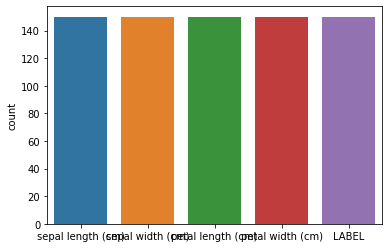

In [12]:
sns.countplot(data=df)

### MACHINE LEARNING

In [13]:
X = df.drop('LABEL', axis=1)
y = df['LABEL']

In [14]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


### SPLITTING X AND Y VALUES IN TWO TRAINING AND TESTING

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


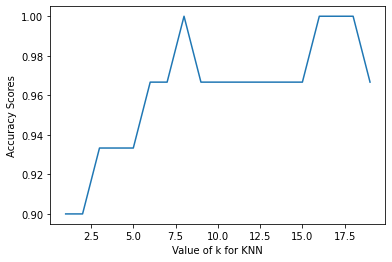

In [17]:
k_range = list(range(1,20))
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Scores')
plt.show()

In [18]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(y_pred)
acc = metrics.accuracy_score(y_test, y_pred)*100
print(f"Accuracy of our KNN model is: {acc}")

[1 2 2 0 2 1 0 2 0 1 1 2 2 2 0 0 2 2 0 0 1 2 0 1 1 2 1 1 1 2]
Accuracy of our KNN model is: 96.66666666666667


In [19]:
from sklearn.metrics import confusion_matrix as cm

In [22]:
conf = cm(y_test, y_pred)
print(conf)


[[ 8  0  0]
 [ 0 10  1]
 [ 0  0 11]]


<AxesSubplot:>

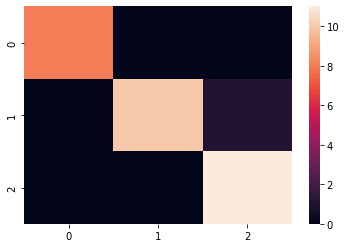

In [25]:
sns.heatmap(conf)
